In [1]:
# Author: Banafsheh Khazali, Emmett Collings
# Date: Oct 2, 2022

In [2]:
import networkx as nx # make sure you installed networkx
import numpy as np
import pandas as pd

In [4]:
# Data representation
df = pd.read_csv("../data/aggregate_pairings_corsi.csv")
df
df.head()

,lineId,playerNames,position,games_played,icetime,iceTimeRank,xGoalsPercentage,corsiPercentage,fenwickPercentage,xOnGoalFor,...,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playerId1,playerId2,corsi_influence_on_player2,corsi_influence_on_player_1
0,84774198480860,Bahl-Geertsen,pairing,3,762.0,14.0,0.40,0.36,0.29,3.65,...,0.10,0.00,0.00,0.71,0.74,0.73,8477419,8480860,-0.094609,-0.086326
1,84758258476902,Lindell-Hakanpaa,pairing,72,16662.0,352.0,0.46,0.41,0.43,102.76,...,1.80,2.24,2.24,10.40,10.36,10.18,8475825,8476902,-0.076468,-0.073153
2,84794028480871,Bean-Boqvist,pairing,26,3844.0,176.0,0.29,0.40,0.38,28.25,...,0.64,1.06,1.06,3.75,3.94,3.89,8479402,8480871,-0.079742,-0.096105
3,84716778479439,Johnson-Macdonald,pairing,5,1396.0,30.0,0.62,0.65,0.58,12.61,...,0.11,0.00,0.00,0.72,0.69,0.69,8471677,8479439,0.041831,0.174655
4,84789158481014,Romanov-Niku,pairing,8,1081.0,60.0,0.60,0.45,0.56,9.96,...,0.10,0.00,0.00,0.68,0.70,0.69,8478915,8481014,-0.050647,0.009830


In [16]:
df1 = df
col_list = list(df1)
col_list[-1], col_list[-2] = col_list[-2], col_list[-1]
col_list[-4], col_list[-5] = col_list[-5], col_list[-4]

df1.rename(columns={'playerId1':'playerId2', 'corsi_influence_on_player2':'corsi_influence_on_player1'})
full_df = pd.concat([df,df1])

              lineId         playerNames position  games_played   icetime  \
0     84774198480860       Bahl-Geertsen  pairing             3     762.0   
1     84758258476902    Lindell-Hakanpaa  pairing            72   16662.0   
2     84794028480871        Bean-Boqvist  pairing            26    3844.0   
3     84716778479439   Johnson-Macdonald  pairing             5    1396.0   
4     84789158481014        Romanov-Niku  pairing             8    1081.0   
...              ...                 ...      ...           ...       ...   
2098  84783968478397   Hanifin-Andersson  pairing           191  108070.0   
2099  84746028477969  Pettersson-Schultz  pairing            44   28948.0   
2100  84746888477369       Soucy-Pateryn  pairing            12    8619.0   
2101  84741518475167     Mcdonagh-Hedman  pairing            82    5081.0   
2102  84799838480160       Ferraro-Simek  pairing            61   15140.0   

      iceTimeRank  xGoalsPercentage  corsiPercentage  fenwickPercentage  \


In [11]:
# Create a network of nodes which are players and the links are players that played together
G = nx.Graph()
G = nx.from_pandas_edgelist(full_df, 'playerId1', 'playerId2', edge_attr='corsi_influence_on_player2',create_using=nx.MultiDiGraph)

nx.write_gexf(G, 'test.gexf')


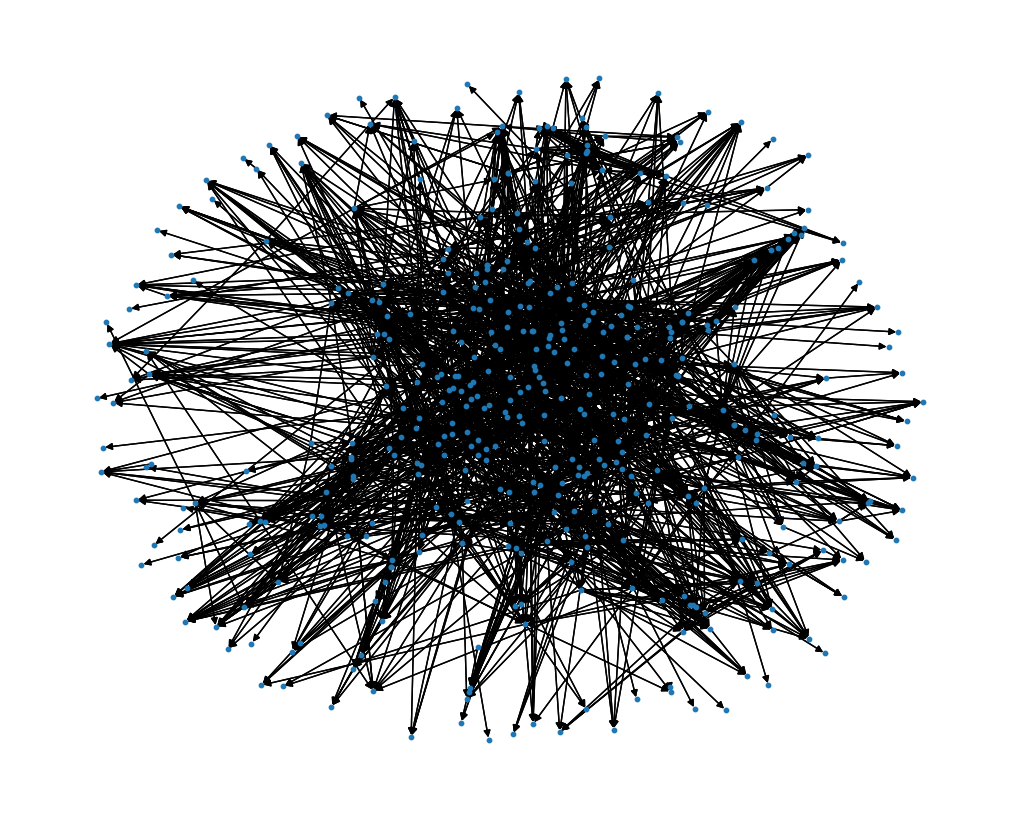

In [7]:
# Plot the network
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_spring(G, node_size=10)

In [12]:
# number of edges
G.number_of_edges()


4206

In [13]:
# number of nodes
G.number_of_nodes()

416

NetworkXNotImplemented: not implemented for directed type

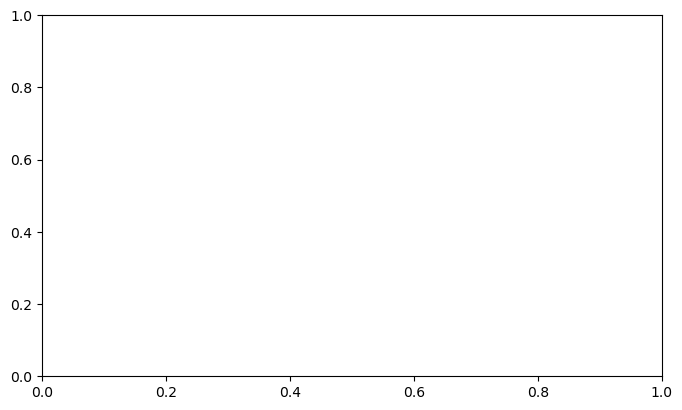

In [10]:
import matplotlib.pyplot as plt
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [25]:
#basic analysis
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

In [26]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  333
Number of edges:  1016

Average degree:  6.102102102102102
Average degree (alternate calculation) 6.102102102102102

Minimum degree:  1
Maximum degree:  14


In [27]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

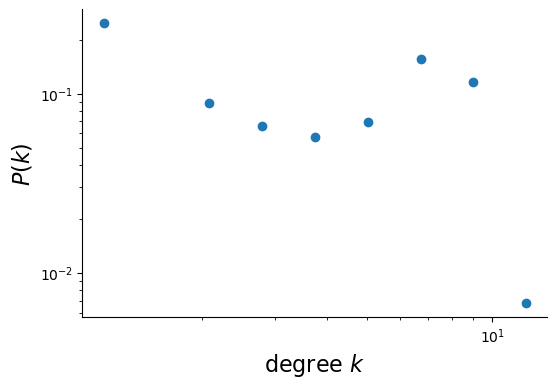

In [28]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [29]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, 10, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

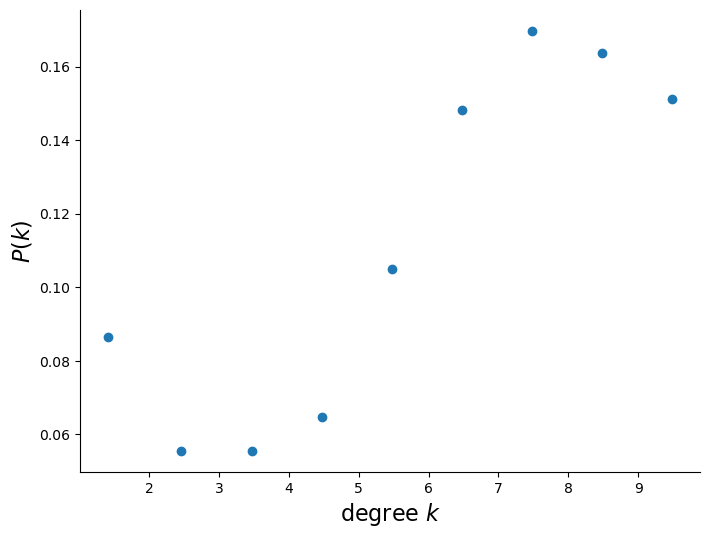

In [30]:
fig = plt.figure(figsize=(8,6))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [31]:
print(nx.info(G))

Graph with 333 nodes and 1016 edges


/tmp/ipykernel_89230/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


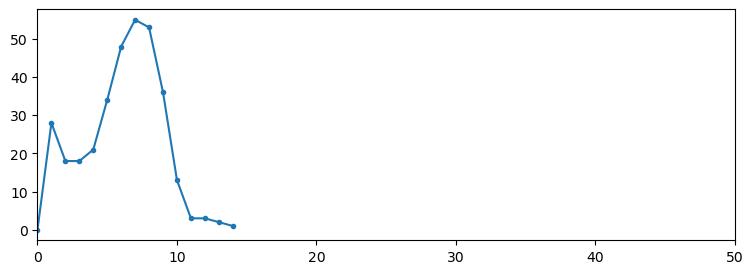

In [32]:
hist = nx.degree_histogram(G)
plt.figure(figsize=(9,3))
plt.plot(hist, marker = '.')
plt.xlim((0,50))
plt.show()

In [33]:
def all_networks(g, start, end):
    def plotpath(g, path):
        h = nx.subgraph(g, path)               
        nx.draw(h, pos = pos, node_color = 'r', edge_color = 'r', 
                node_size = 100, aplha = 0.7, width = 2)
             
    paths = nx.all_shortest_paths(g, source = start, target = end)
    paths = [i for i in paths]
    h = nx.subgraph(g, sum([i for i in paths], []))    
    labels = nx.get_node_attributes(h, 'label')   
    i = nx.subgraph(g, sum([nx.neighbors(g, i) for i in h.nodes()], []))  
    pos = nx.fruchterman_reingold_layout(i)
    
    plt.figure(figsize=(9,6))
    nx.draw(i, pos = pos, node_color = 'b', edge_color = 'b', node_size = 50, alpha = 0.5)
    [plotpath(g, i) for i in paths]
    nx.draw_networkx_labels(i, pos = pos, labels = labels, font_size = 10)
    plt.show()

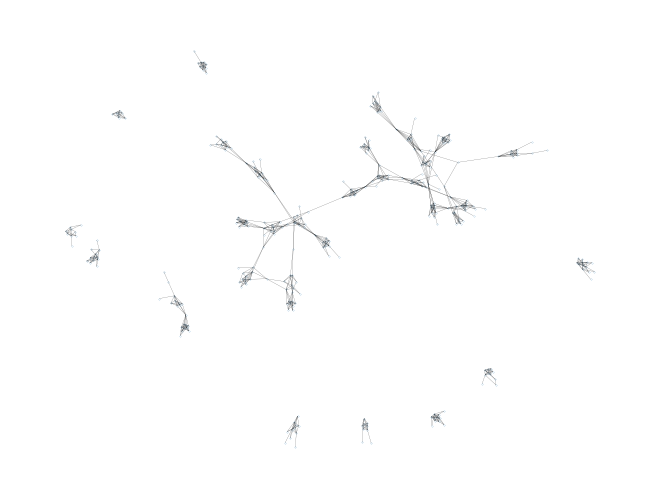

In [34]:
nx.draw(G, pos=nx.spring_layout(G), node_size=0.01, width=0.1)


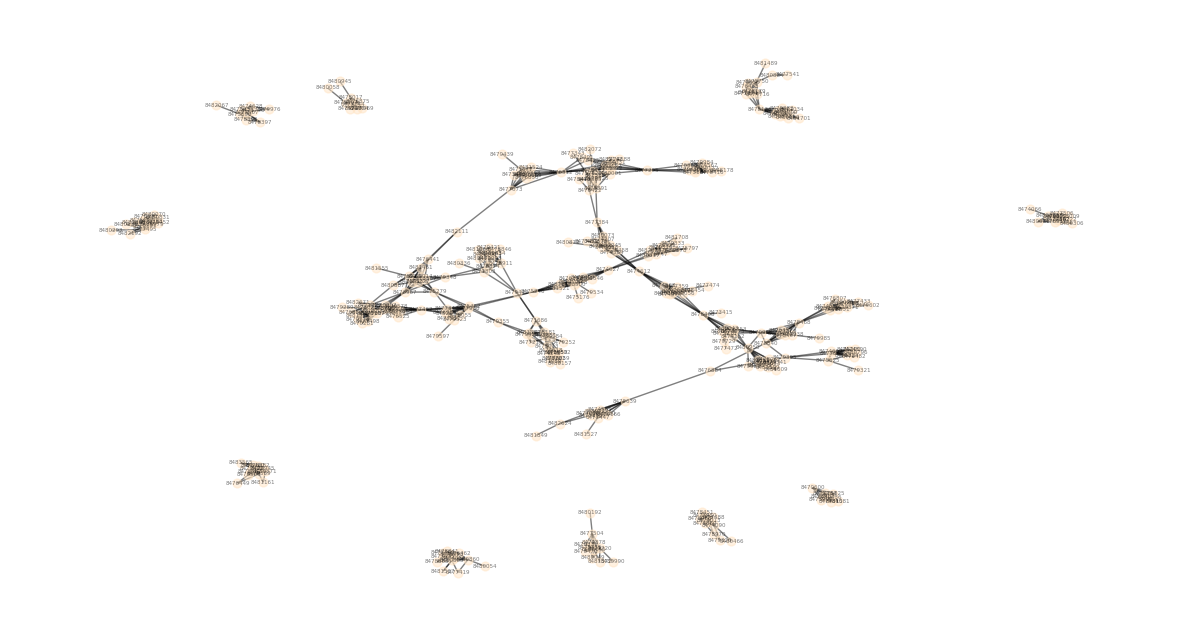

In [35]:
fig, ax = plt.subplots(figsize=(15, 8))

nx.draw_spring(G, node_color='bisque', with_labels=True , node_size = 40 , font_size = 4 , alpha = 0.5)